<a href="https://colab.research.google.com/github/A-Istrate/80629_Project/blob/main/ML_TPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import math
import copy
from random import seed
from random import random
import matplotlib.pyplot as plt  # import matplotlib for plotting and visualization
import matplotlib
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import os
from tensorflow.keras import layers
from sklearn.utils import class_weight

Checking our images

In [94]:
## images path
path = pathlib.Path(r"C:\Users\istra\Google Drive\Cours HEC\Maitrise\Semestre 2\Machine_Learning\TP GROUPE\book_covers")
image_count=len(list(path.glob('*/*.jpg')))
print(image_count)

33212


Checking a childrens book

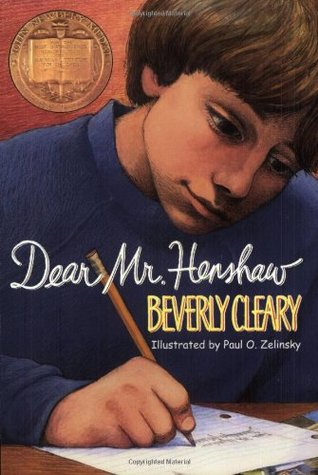

In [95]:
children = list(path.glob('Childrens/*'))
PIL.Image.open(str(children[12]))

Creating a dataset

In [108]:
batch_size =32
img_height = 96
img_width =64
train_img =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=80629,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 33212 files belonging to 12 classes.
Using 26570 files for training.


In [109]:
valid_img =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=80629,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 33212 files belonging to 12 classes.
Using 6642 files for validation.


Classes

In [98]:
class_names = train_img.class_names
print(class_names)
print(len(class_names))

['Childrens', 'Classics', 'Cultural', 'Fantasy', 'Historical', 'History', 'Horror', 'Mystery', 'Romance', 'Science Fiction', 'Sequential Art', 'Young Adult']
12


Visualisation

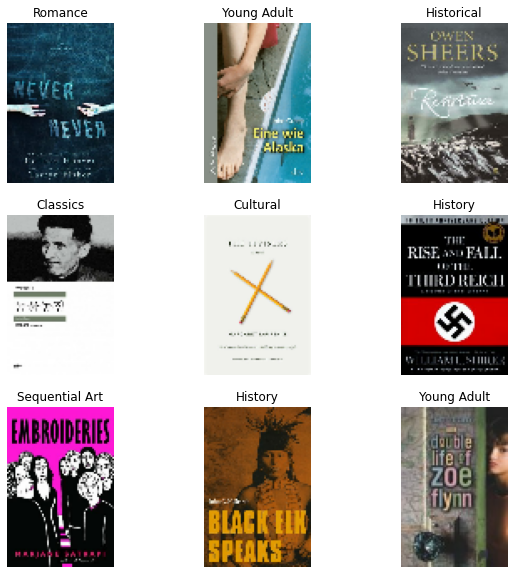

In [110]:
plt.figure(figsize=(10,10))
for images, labels in train_img.take(1):
  for i in range(9):
    ax:plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Size off the data

In [100]:
for image_batch, labels_batch in train_img:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 100, 3)
(32,)


Standardisation

In [81]:

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_img.cla),
                                                 train_img)

AttributeError: 'PrefetchDataset' object has no attribute 'ref'

In [111]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

Setting the model

In [118]:
AUTOTUNE = tf.data.AUTOTUNE
train_img = train_img.cache().prefetch(buffer_size=AUTOTUNE)
valid_img = valid_img.cache().prefetch(buffer_size=AUTOTUNE)

num_classes=12

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3,strides=1, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, 3,strides=1,  activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3,strides=1,  activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [124]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.0001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=True, 
    name='RMSprop'
),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Training

In [130]:
history = model.fit(
    train_img,
    validation_data=valid_img,
    epochs=10
)

Epoch 1/10
831/831 [==============================] - 58s 70ms/step - loss: 1.3534 - accuracy: 0.5621 - val_loss: 2.0378 - val_accuracy: 0.3329
Epoch 2/10
831/831 [==============================] - 57s 69ms/step - loss: 1.3532 - accuracy: 0.5623 - val_loss: 2.0378 - val_accuracy: 0.3332
Epoch 3/10
831/831 [==============================] - 59s 71ms/step - loss: 1.3530 - accuracy: 0.5623 - val_loss: 2.0379 - val_accuracy: 0.3332
Epoch 4/10
831/831 [==============================] - 63s 76ms/step - loss: 1.3529 - accuracy: 0.5623 - val_loss: 2.0380 - val_accuracy: 0.3330
Epoch 5/10
831/831 [==============================] - 57s 69ms/step - loss: 1.3528 - accuracy: 0.5623 - val_loss: 2.0380 - val_accuracy: 0.3329
Epoch 6/10
831/831 [==============================] - 60s 72ms/step - loss: 1.3527 - accuracy: 0.5624 - val_loss: 2.0381 - val_accuracy: 0.3329
Epoch 7/10
831/831 [==============================] - 57s 69ms/step - loss: 1.3526 - accuracy: 0.5625 - val_loss: 2.0382 - val_accuracy:

Saving our model after 3 iterations

In [60]:
model_3 = model

In [61]:
model_3.save("model_3.h5")

In [131]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


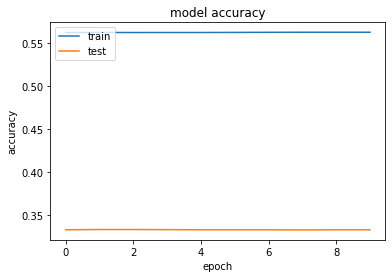

In [132]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [136]:
predictions = model_3.predict(valid_img)
predicted_classes = np.argmax(predictions, axis=1)

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(valid_img.classes, predicted_classes, labels=list(valid_img.class_indices.keys()))

AttributeError: 'PrefetchDataset' object has no attribute 'classes'

In [154]:
valid_img.

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.from_tensor_slices(tensors)>